In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from tqdm import tqdm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim

# 0.1

## 2.

In [2]:
q = np.array([0,0.2,0.4,0.7,0.9,1])

In [3]:
def du(t,u,q):
    return u**q

In [4]:
def f(t,q):
    if q == 1:
        y = np.exp(t)
    elif q < 1:
        y = (t*(1-q)+1)**(1/(1-q))
    else:
        y = t*(1-q)+1
    
    return y

In [5]:
t = np.linspace(0,10,1000)

In [6]:
def RK4(t,u,f,q):
    h = (t[-1] - t[0])/(len(t)-1)
    
    y = np.zeros(len(t))
    y[0] = u
    Npoints = len(t)
        
    for i in range(1,Npoints):
        
        k1 = f(t[i-1],y[i-1],q)
        k2 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k1*h,q)
        k3 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k2*h,q)
        k4 = f(t[i-1] + h, y[i-1] + k3*h,q)
        
        y[i] = y[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    
    
    return y

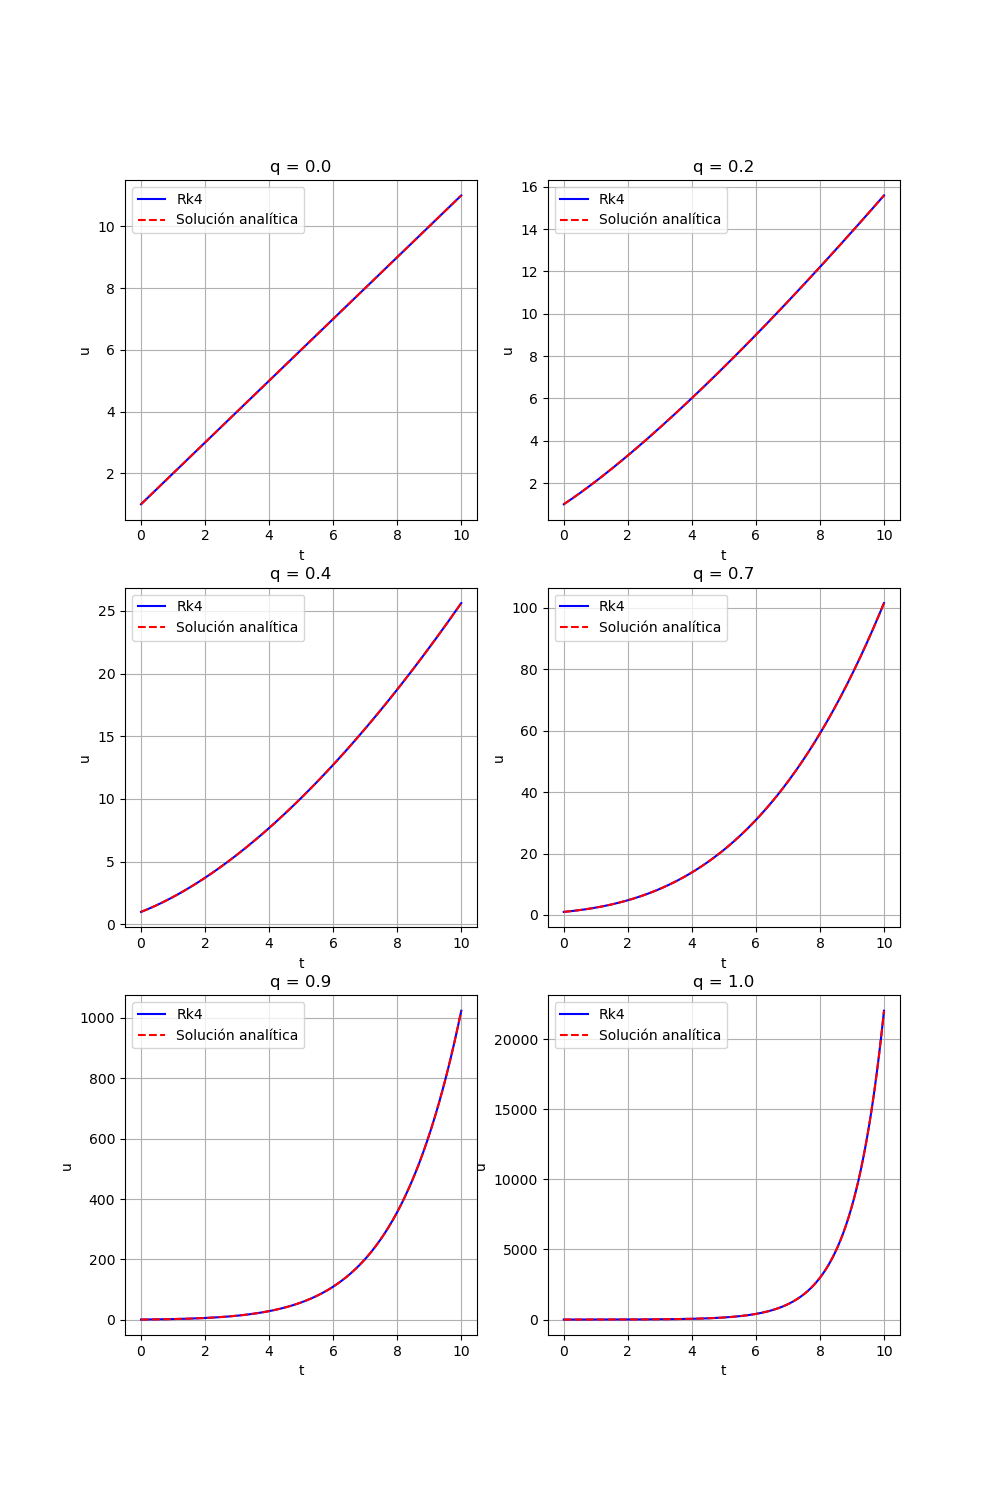

In [7]:
fig = plt.figure(figsize=(10,15))
for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    y = RK4(t,1,du,q[i])
    ax.plot(t,y,label = "Rk4", c="b")
    ax.plot(t,f(t,q[i]), "--" ,label = "Solución analítica", c = "r")
    ax.grid()
    ax.legend()
    ax.set_xlabel("t")
    ax.set_ylabel("u")
    ax.set_title(("q = {}").format(q[i]))

# 0.2

In [8]:
x = sym.Symbol('x',Real=True)
h = sym.Symbol('h',Real=True)

In [9]:
f0 = (x-(-h))*(x-(-2*h))/(2*h**2)
f1 = (x-(-2*h))*x/(-h**2)
f2 = (x-(-h))*x/(2*h**2)

b0 = sym.integrate(f0,(x,0,h))
b1 = sym.integrate(f1,(x,0,h))
b2 = sym.integrate(f2,(x,0,h))

print(f'Los coeficientes de Adams-Bashforth 3 puntos son b0={b0}, b1={b1}, b2={b2}')

Los coeficientes de Adams-Bashforth 3 puntos son b0=23*h/12, b1=-4*h/3, b2=5*h/12


In [10]:
f0 = (x-(-h))*(x-(-2*h))*(x-(-3*h))/(6*h**3)
f1 = (x-(-2*h))*(x-(-3*h))*x/(-2*h**3)
f2 = (x-(-h))*(x-(-3*h))*x/(2*h**3)
f3 = (x-(-h))*(x-(-2*h))*x/(-6*h**3)

b0 = sym.integrate(f0,(x,0,h))
b1 = sym.integrate(f1,(x,0,h))
b2 = sym.integrate(f2,(x,0,h))
b3 = sym.integrate(f3,(x,0,h))

print(f'Los coeficientes de Adams-Bashforth 4 puntos son b0={b0}, b1={b1}, b2={b2}, b3={b3}')

Los coeficientes de Adams-Bashforth 4 puntos son b0=55*h/24, b1=-59*h/24, b2=37*h/24, b3=-3*h/8


In [11]:
f0 = x*(x-(-h))/(2*h**2)
f1 = (x-(-h))*(x-h)/(-1*h**2)
f2 = (x-h)*x/(2*h**2)

b0 = sym.integrate(f0,(x,0,h))
b1 = sym.integrate(f1,(x,0,h))
b2 = sym.integrate(f2,(x,0,h))

print(f'Los coeficientes de Adams-Moulton 3 puntos son b0={b0}, b1={b1}, b2={b2}')

Los coeficientes de Adams-Moulton 3 puntos son b0=5*h/12, b1=2*h/3, b2=-h/12


In [12]:
f0 = (x-(-h))*(x-(-2*h))*x/(6*h**3)
f1 = (x-(-h))*(x-h)*(x-(-2*h))/(-2*h**3)
f2 = (x-h)*(x-(-2*h))*x/(2*h**3)
f3 = (x-h)*(x-(-h))*x/(-6*h**3)

b0 = sym.integrate(f0,(x,0,h))
b1 = sym.integrate(f1,(x,0,h))
b2 = sym.integrate(f2,(x,0,h))
b3 = sym.integrate(f3,(x,0,h))

print(f'Los coeficientes de Adams-Moulton 4 puntos son b0={b0}, b1={b1}, b2={b2}, b3={b3}')

Los coeficientes de Adams-Moulton 4 puntos son b0=3*h/8, b1=19*h/24, b2=-5*h/24, b3=h/24


# 0.3

In [13]:
# Definimos la clase particula
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        
        self.Ep = 0.
        self.Force = self.m * self.a
        self.G = 4*np.pi**2
        #self.G = 4*np.pi**2/365.2421**2
        
        # Initial condition
        
        # Esto significa en el pasado
        
        self.rp = r0
        self.vp = v0
        
           
        
    def Evolution(self,i):
        
        # fill vectors
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        
        
        # Energy 
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        # Change variables using the verlet method
        
        self.a = self.Force/self.m
        
     
        if i == 0:
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
        
  
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
        
    
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
    
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep

    
    # Getters
    
    def GetForce(self,p):
        
        self.epsilon = 0.1
        
        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / (d**2 + self.epsilon**2)**(3/2)
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / d
                
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):
        #return -np.dot( self.m*self.a, self.r )
        return 0.5*self.Ep 
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  
    # Reducing size

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [14]:
def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = np.array([])
    G = 4*np.pi**2
    
    R = np.random.uniform(-1,1,(NParticles,3))
    a0 = np.zeros(3)
    v0 = np.zeros(3)
    m = 0.01

    
    for i in range(NParticles):
        p = Particle(R[i],v0,a0,t,m,0.3,i)
        
        Particles_ = np.append(Particles_,p)
        
        
    return Particles_

In [15]:
Limits = np.array([1.,1.,1.]) 

In [16]:
def RunSimulation(t,NParticles = 10, Velo = 6):
    
    # Creating the particles
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
      
    for it in tqdm(range(len(t))):
        
        NetForce = np.array([0,0,0])
        
        for i in range(len(Particles)):
            ii = Particles != Particles[i]
            q = Particles[ii]
            for j in q:
                Particles[i].GetForce(j)
             
        #    NetForce = np.add(NetForce,Particles[i].GetNetForce())
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            
            #Particles[i].CheckWallLimits(Limits)
             
        #print(NetForce)
        
    return Particles

In [17]:
dt = 0.001
tmax = 2
t = np.arange(0.,tmax+dt,dt)

In [18]:
Particles = RunSimulation(t,100,Velo = 20)

100%|███████████████████████████████████████| 2001/2001 [28:40<00:00,  1.16it/s]


In [19]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector

for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 

Momentum = Particles[0].GetMomentumVector()
for i in range(1,len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector()) 

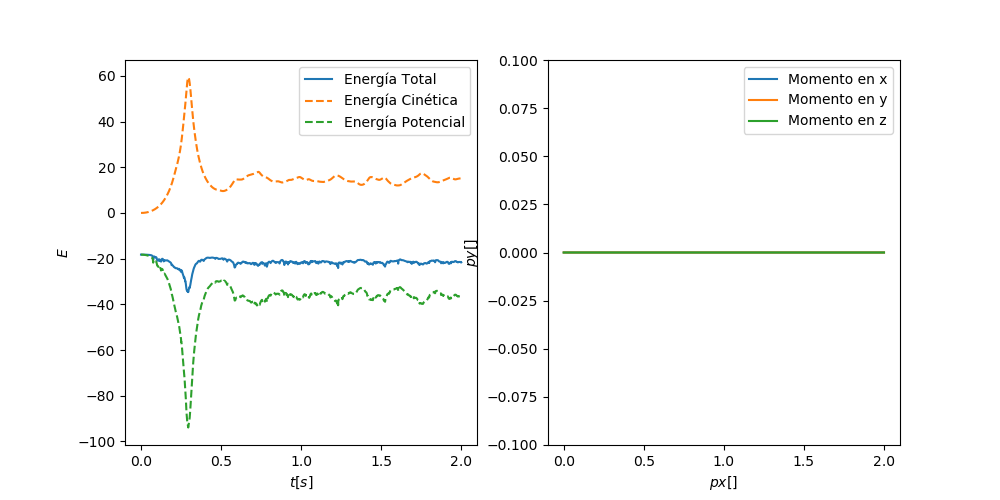

In [20]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
#ax1.set_yscale('log')
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], label='Momento en x')
ax2.plot(t,Momentum[:,1], label='Momento en y')
ax2.plot(t,Momentum[:,2], label='Momento en z')
ax2.set_xlabel(r'$px[]$',fontsize=10)
ax2.set_ylabel(r'$py[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)

plt.show()
#plt.savefig('NBodyEnergia.pdf')

In [21]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [22]:
redt = ReduceTime(t,10)

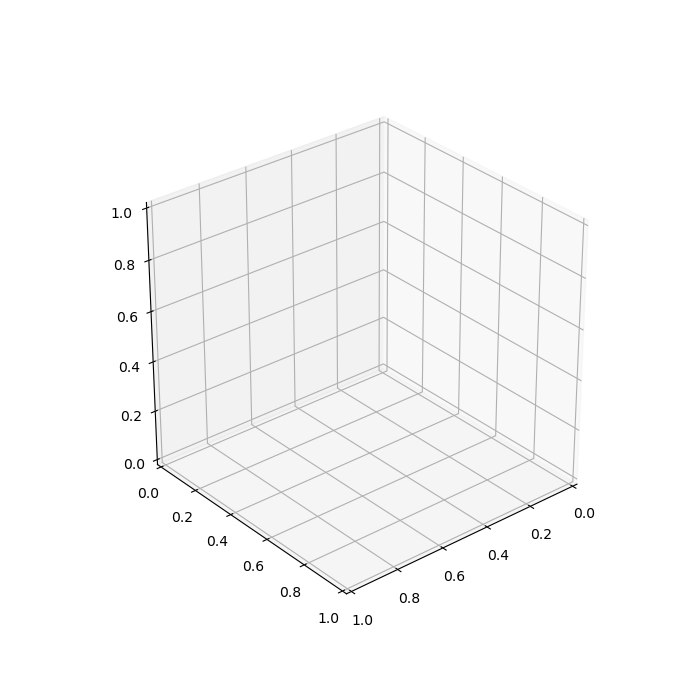

In [23]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-Limits[0]-1,Limits[0]+1)
    ax.set_ylim(-Limits[1]-1,Limits[1]+1)
    ax.set_zlim(-Limits[2]-1,Limits[2]+1)


def Update(i):
    
    plot = ax.clear()
    init()
    
    j = 0
    
    for p in Particles:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        
        plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]))
        
        plot = ax.scatter(x,y,z,marker='.')

        j += 1
        
     

            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [24]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
Animation.save('ColisionParticulas.mp4', writer=writer_)

In [25]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector

for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 

Momentum = Particles[0].GetMomentumVector()
for i in range(1,len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector()) 

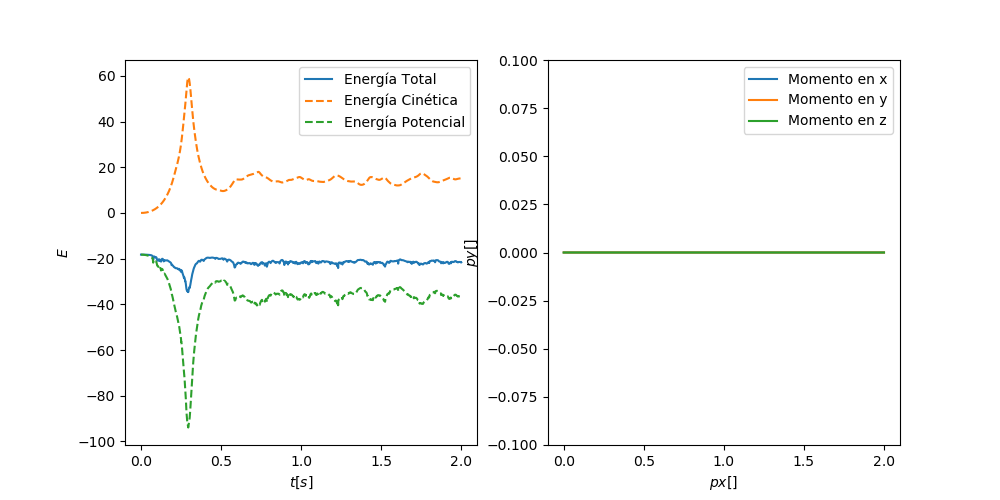

In [26]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
#ax1.set_yscale('log')
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], label='Momento en x')
ax2.plot(t,Momentum[:,1], label='Momento en y')
ax2.plot(t,Momentum[:,2], label='Momento en z')
ax2.set_xlabel(r'$px[]$',fontsize=10)
ax2.set_ylabel(r'$py[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)

plt.show()
#plt.savefig('NBodyEnergia.pdf')

In [27]:
m = 0.01

#w = np.zeros((len(t),3))

AMomentum = np.zeros(len(t))
for i in range(len(t)):
    w = np.zeros(3)
    for j in range(len(Particles)):
        w = np.add(w,(np.cross(m*Particles[j].GetPositionVector()[i],Particles[j].GetVelocityVector()[i])))
        
    AMomentum[i] = np.linalg.norm(w)


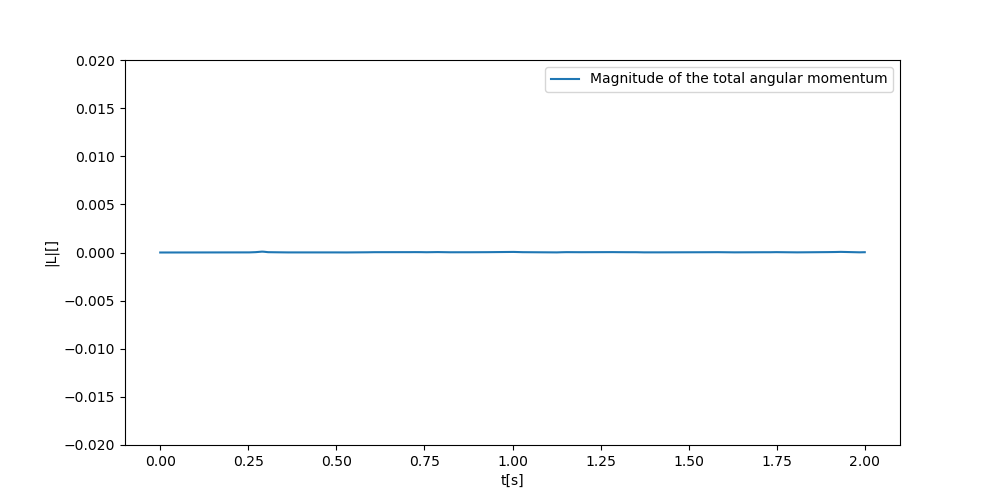

In [28]:
fig2 = plt.figure(figsize=(10,5))
ax4 = fig2.add_subplot(1,1,1)
ax4.plot(t,AMomentum, label = "Magnitude of the total angular momentum")
ax4.set_ylim(-0.02,0.02)
ax4.set_ylabel("|L|[]")
ax4.set_xlabel("t[s]")
ax4.legend()

# 0.4

## 1.

In [29]:
TMin, TMax, N = 0.,10., 201
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)
print(h, t.shape)

0.05 (201,)


In [30]:
r0 = np.array([1.0,0])

In [31]:
def GetA(x):
    return -x

In [32]:
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [33]:
def GetYoshida(r0,t):
    N = len(t)
    h = t[1] - t[0]
    
    x0 =  -2**(1/3)/(2-2**(1/3))
    x1 = 1/(2-2**(1/3))

    d = np.array([x1,x0,x1,0])

    c = np.array([0.5*x1,0.5*(x0+x1),0.5*(x0+x1),0.5*x1])
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        xi = x[i-1]
        vi = v[i-1]
        for j in range(4):
            xi += c[j]*h*vi
            vi += d[j]*h*GetA(xi)
        x[i] = xi
        v[i] = vi
        
    return x[1:],v[1:]
    

In [34]:
x, v = GetLeapFrog(r0,t)
x1,v1 = GetYoshida(r0,t)

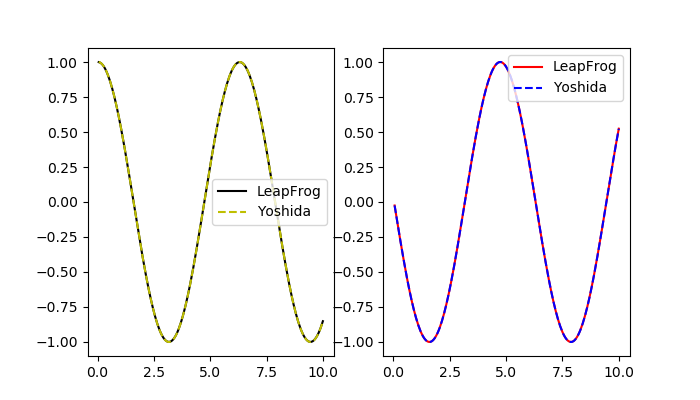

In [35]:
fig0 = plt.figure(figsize=(7,4))
ax = fig0.add_subplot(121)
ax1 = fig0.add_subplot(122)
ax.plot(t[1:],x, '-k',label='LeapFrog')
ax.plot(t[1:],x1, "--y", label = "Yoshida")
ax1.plot(t[1:],v, '-r',label='LeapFrog')
ax1.plot(t[1:],v1, '--b',label='Yoshida')
ax.legend()
ax1.legend()
plt.show()

In [36]:
Ep = 1/2*x**2
Ek = 1/2*v**2
E = Ep+Ek

Ep1 = 0.5*x1**2
Ek1 = 0.5*v1**2
E1 = Ep1+Ek1

<function matplotlib.pyplot.show(*args, **kw)>

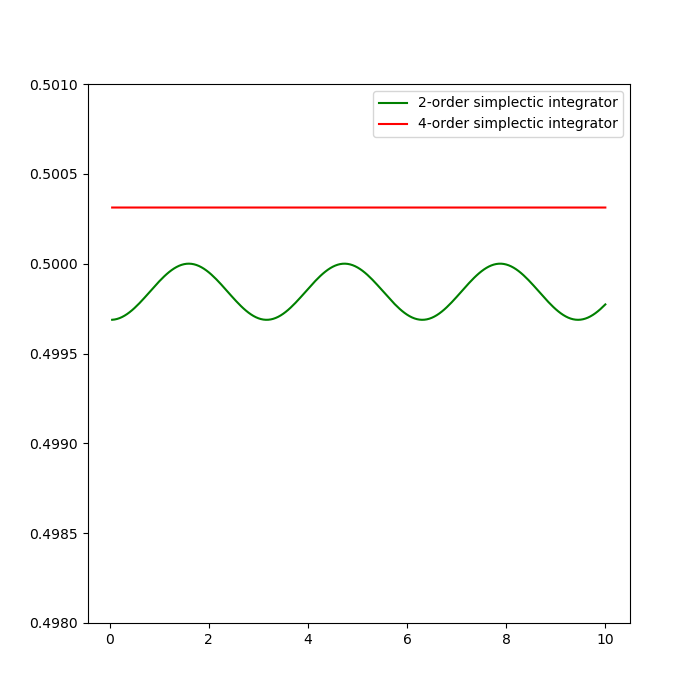

In [37]:
fig1 = plt.figure(figsize=(7,7))
ax = fig1.add_subplot(111)
ax.plot(t[1:],E, '-g',label='2-order simplectic integrator')
ax.plot(t[1:],E1, '-r',label='4-order simplectic integrator')
ax.legend()
#fig1.savefig("ñ.png")

ax.set_ylim(0.4980,0.5010)
plt.show